<a href="https://colab.research.google.com/github/MehrDataPythonist/daily-dev-/blob/main/2ravesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# سلول 1: وارد کردن کتابخانه‌ها و تعریف پارامترها
import numpy as np
import matplotlib.pyplot as plt

mu = 0.1
beta_1 = -2.0573
beta_2 = 2.6724
gamma = -0.6814
delta = -0.0511
f_0 = 10

f_d_range = np.linspace(9.9, 10.1, 50)
phi_n_range = np.linspace(0, 0.5, 50)

In [ ]:
# سلول 2: تعریف توابع مورد نیاز
def Psi_equation(r, Omega, phi_n):
    numerator = -((mu * gamma + Omega * delta) * r + (beta_1 * gamma + beta_2 * delta) * r**3)
    denominator = phi_n * (delta**2 + gamma**2)
    ratio = numerator / denominator
    ratio = np.clip(ratio, -1, 1)
    Psi_plus = np.arccos(ratio)
    Psi_minus = -np.arccos(ratio)
    return Psi_plus, Psi_minus

def jacobian_matrix(r, Psi, Omega, phi_n):
    j11 = mu + 3 * beta_1 * r**2
    j12 = phi_n * (-gamma * np.sin(Psi) + delta * np.cos(Psi))
    j21 = 2 * beta_2 * r + phi_n / r**2 * (gamma * np.sin(Psi) - delta * np.cos(Psi))
    j22 = -phi_n / r * (gamma * np.cos(Psi) + delta * np.sin(Psi))
    return np.array([[j11, j12], [j21, j22]])

In [8]:
# سلول 3: محاسبه ماتریس پایداری با استفاده از روش مقادیر ویژه
stability_matrix = np.zeros((len(f_d_range), len(phi_n_range)))

for i, f_d in enumerate(f_d_range):
    for j, phi_n in enumerate(phi_n_range):
        Omega = 2 * np.pi * (f_d - f_0)
        coefficients = [
            (beta_1**2 + beta_2**2),
            0,
            2 * (mu * beta_1 + Omega * beta_2),
            0,
            (mu**2 + Omega**2),
            0,
            -phi_n * (gamma**2 + delta**2)
        ]
        roots = np.roots(coefficients)
        real_roots = [r.real for r in roots if np.isreal(r) and r.real > 0]

        for r_star in real_roots:
            Psi_plus, Psi_minus = Psi_equation(r_star, Omega, phi_n)
            for Psi_star in [Psi_plus, Psi_minus]:
                J_evaluated = jacobian_matrix(r_star, Psi_star, Omega, phi_n)
                eigenvalues = np.linalg.eigvals(J_evaluated)
                if all(e.real < 0 for e in eigenvalues):
                    stability_matrix[i, j] = 1
                    break
            if stability_matrix[i, j] == 1:
                break

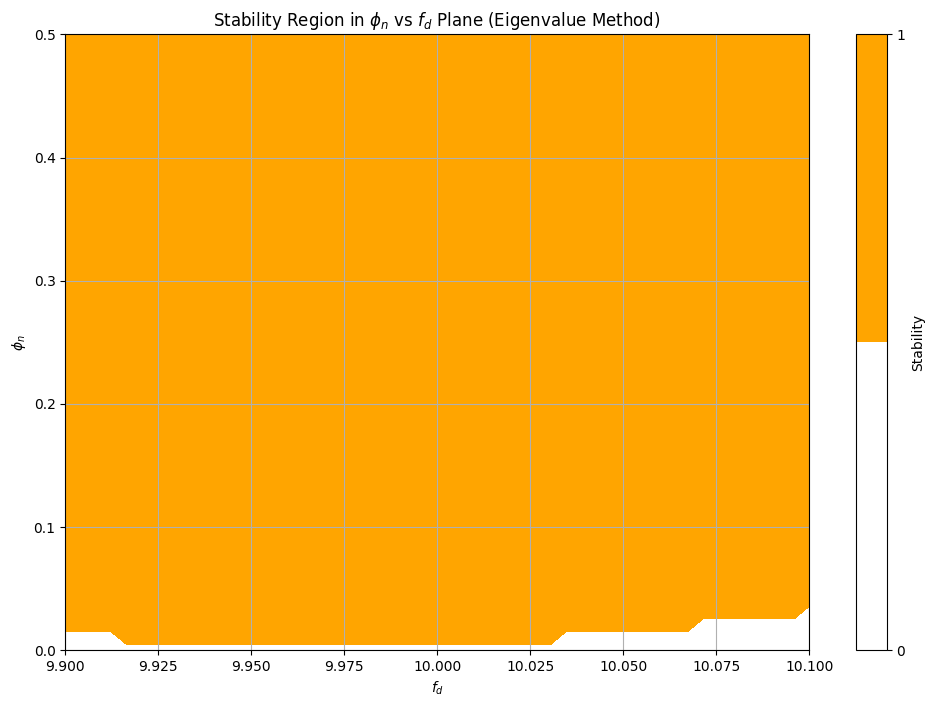

In [9]:
# سلول 4: رسم نمودار کانتوری برای روش مقادیر ویژه
plt.figure(figsize=(12, 8))
f_d_grid, phi_n_grid = np.meshgrid(f_d_range, phi_n_range)
plt.contourf(f_d_grid, phi_n_grid, stability_matrix.T, levels=[0, 0.5, 1], colors=['white', 'orange'])
plt.xlabel('$f_d$')
plt.ylabel('$\phi_n$')
plt.title('Stability Region in $\phi_n$ vs $f_d$ Plane (Eigenvalue Method)')
plt.colorbar(ticks=[0, 1], label='Stability')
plt.grid(True)
plt.show()

In [14]:
# سلول 3.5: چاپ جزئیات برای روش مقادیر ویژه
for i, f_d in enumerate(f_d_range):
    for j, phi_n in enumerate(phi_n_range):
        Omega = 2 * np.pi * (f_d - f_0)
        coefficients = [
            (beta_1**2 + beta_2**2),
            0,
            2 * (mu * beta_1 + Omega * beta_2),
            0,
            (mu**2 + Omega**2),
            0,
            -phi_n * (gamma**2 + delta**2)
        ]
        roots = np.roots(coefficients)
        real_roots = [r.real for r in roots if np.isreal(r) and r.real > 0]

        print(f"f_d = {f_d:.4f}, phi_n = {phi_n:.4f}")
        print(f"Real positive roots: {real_roots}")

        for r_star in real_roots:
            Psi_plus, Psi_minus = Psi_equation(r_star, Omega, phi_n)
            for Psi_star in [Psi_plus, Psi_minus]:
                J_evaluated = jacobian_matrix(r_star, Psi_star, Omega, phi_n)
                eigenvalues = np.linalg.eigvals(J_evaluated)
                print(f"r* = {r_star:.4f}, Ψ* = {Psi_star:.4f}")
                print(f"Eigenvalues: {eigenvalues}")
                if all(e.real < 0 for e in eigenvalues):
                    print("Stable")
                else:
                    print("Unstable")
        print("\n")

        # برای جلوگیری از چاپ تعداد زیادی خروجی، فقط چند مورد اول را چاپ می‌کنیم
        if i * len(phi_n_range) + j > 10:
            print("...")
            break
    if i * len(phi_n_range) + j > 10:
        break

f_d = 9.9000, phi_n = 0.0000
Real positive roots: []


f_d = 9.9000, phi_n = 0.0102
Real positive roots: [0.11561716493652492]
r* = 0.1156, Ψ* = 1.0883
Eigenvalues: [-0.00830198  0.05769747]
Unstable
r* = 0.1156, Ψ* = -1.0883
Eigenvalues: [0.02070258+0.08373104j 0.02070258-0.08373104j]
Unstable


f_d = 9.9000, phi_n = 0.0204
Real positive roots: [0.17977838747817204]
r* = 0.1798, Ψ* = 1.6626
Eigenvalues: [-0.14934905  0.04855338]
Unstable
r* = 0.1798, Ψ* = -1.6626
Eigenvalues: [-0.05617418+0.13111043j -0.05617418-0.13111043j]
Stable


f_d = 9.9000, phi_n = 0.0306
Real positive roots: [0.3874832991067473]
r* = 0.3875, Ψ* = 3.1416
Eigenvalues: [-0.83081804 -0.04968391]
Stable
r* = 0.3875, Ψ* = -3.1416
Eigenvalues: [-0.83081804 -0.04968391]
Stable


f_d = 9.9000, phi_n = 0.0408
Real positive roots: [0.43710301346421865]
r* = 0.4371, Ψ* = 3.1416
Eigenvalues: [-1.08395065 -0.05887524]
Stable
r* = 0.4371, Ψ* = -3.1416
Eigenvalues: [-1.08395065 -0.05887524]
Stable


f_d = 9.9000, phi_n = 0.05

In [10]:
# سلول 1: وارد کردن کتابخانه‌ها و تعریف پارامترها
import numpy as np
import matplotlib.pyplot as plt

mu = 0.1
beta_1 = -2.0573
beta_2 = 2.6724
gamma = -0.6814
delta = -0.0511
f_0 = 10

f_d_range = np.linspace(9.9, 10.1, 50)
phi_n_range = np.linspace(0, 0.5, 50)

In [11]:
# سلول 2: تعریف توابع مورد نیاز
def Psi_equation(r, Omega, phi_n):
    numerator = -((mu * gamma + Omega * delta) * r + (beta_1 * gamma + beta_2 * delta) * r**3)
    denominator = phi_n * (delta**2 + gamma**2)
    ratio = numerator / denominator
    ratio = np.clip(ratio, -1, 1)
    Psi_plus = np.arccos(ratio)
    Psi_minus = -np.arccos(ratio)
    return Psi_plus, Psi_minus

def jacobian_matrix(r, Psi, Omega, phi_n):
    j11 = mu + 3 * beta_1 * r**2
    j12 = phi_n * (-gamma * np.sin(Psi) + delta * np.cos(Psi))
    j21 = 2 * beta_2 * r + phi_n / r**2 * (gamma * np.sin(Psi) - delta * np.cos(Psi))
    j22 = -phi_n / r * (gamma * np.cos(Psi) + delta * np.sin(Psi))
    return np.array([[j11, j12], [j21, j22]])

In [12]:
# سلول 3: محاسبه ماتریس پایداری با استفاده از روش تریس و دترمینان
stability_matrix = np.zeros((len(f_d_range), len(phi_n_range)))

for i, f_d in enumerate(f_d_range):
    for j, phi_n in enumerate(phi_n_range):
        Omega = 2 * np.pi * (f_d - f_0)
        coefficients = [
            (beta_1**2 + beta_2**2),
            0,
            2 * (mu * beta_1 + Omega * beta_2),
            0,
            (mu**2 + Omega**2),
            0,
            -phi_n * (gamma**2 + delta**2)
        ]
        roots = np.roots(coefficients)
        real_roots = [r.real for r in roots if np.isreal(r) and r.real > 0]

        for r_star in real_roots:
            Psi_plus, Psi_minus = Psi_equation(r_star, Omega, phi_n)
            for Psi_star in [Psi_plus, Psi_minus]:
                J_evaluated = jacobian_matrix(r_star, Psi_star, Omega, phi_n)
                det_J = np.linalg.det(J_evaluated)
                trace_J = np.trace(J_evaluated)
                if det_J > 0 and trace_J < 0:
                    stability_matrix[i, j] = 1
                    break
            if stability_matrix[i, j] == 1:
                break

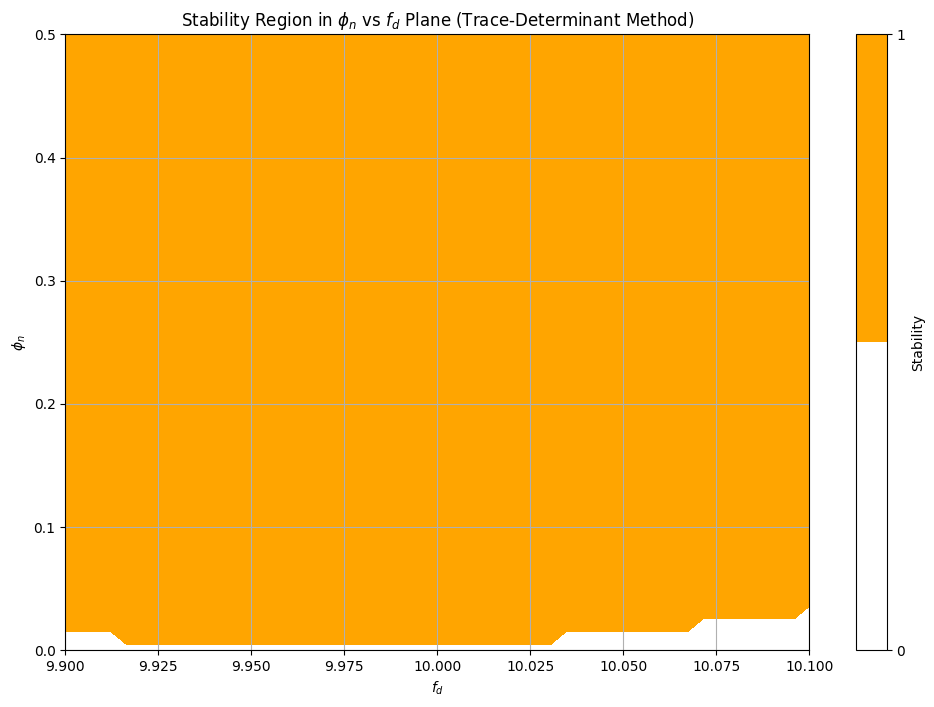

In [13]:
# سلول 4: رسم نمودار کانتوری برای روش تریس و دترمینان
plt.figure(figsize=(12, 8))
f_d_grid, phi_n_grid = np.meshgrid(f_d_range, phi_n_range)
plt.contourf(f_d_grid, phi_n_grid, stability_matrix.T, levels=[0, 0.5, 1], colors=['white', 'orange'])
plt.xlabel('$f_d$')
plt.ylabel('$\phi_n$')
plt.title('Stability Region in $\phi_n$ vs $f_d$ Plane (Trace-Determinant Method)')
plt.colorbar(ticks=[0, 1], label='Stability')
plt.grid(True)
plt.show()

In [15]:
# سلول 3.5: چاپ جزئیات برای روش تریس و دترمینان
for i, f_d in enumerate(f_d_range):
    for j, phi_n in enumerate(phi_n_range):
        Omega = 2 * np.pi * (f_d - f_0)
        coefficients = [
            (beta_1**2 + beta_2**2),
            0,
            2 * (mu * beta_1 + Omega * beta_2),
            0,
            (mu**2 + Omega**2),
            0,
            -phi_n * (gamma**2 + delta**2)
        ]
        roots = np.roots(coefficients)
        real_roots = [r.real for r in roots if np.isreal(r) and r.real > 0]

        print(f"f_d = {f_d:.4f}, phi_n = {phi_n:.4f}")
        print(f"Real positive roots: {real_roots}")

        for r_star in real_roots:
            Psi_plus, Psi_minus = Psi_equation(r_star, Omega, phi_n)
            for Psi_star in [Psi_plus, Psi_minus]:
                J_evaluated = jacobian_matrix(r_star, Psi_star, Omega, phi_n)
                det_J = np.linalg.det(J_evaluated)
                trace_J = np.trace(J_evaluated)
                print(f"r* = {r_star:.4f}, Ψ* = {Psi_star:.4f}")
                print(f"Determinant: {det_J:.4f}, Trace: {trace_J:.4f}")
                if det_J > 0 and trace_J < 0:
                    print("Stable")
                else:
                    print("Unstable")
        print("\n")

        # برای جلوگیری از چاپ تعداد زیادی خروجی، فقط چند مورد اول را چاپ می‌کنیم
        if i * len(phi_n_range) + j > 10:
            print("...")
            break
    if i * len(phi_n_range) + j > 10:
        break

f_d = 9.9000, phi_n = 0.0000
Real positive roots: []


f_d = 9.9000, phi_n = 0.0102
Real positive roots: [0.11561716493652492]
r* = 0.1156, Ψ* = 1.0883
Determinant: -0.0005, Trace: 0.0494
Unstable
r* = 0.1156, Ψ* = -1.0883
Determinant: 0.0074, Trace: 0.0414
Unstable


f_d = 9.9000, phi_n = 0.0204
Real positive roots: [0.17977838747817204]
r* = 0.1798, Ψ* = 1.6626
Determinant: -0.0073, Trace: -0.1008
Unstable
r* = 0.1798, Ψ* = -1.6626
Determinant: 0.0203, Trace: -0.1123
Stable


f_d = 9.9000, phi_n = 0.0306
Real positive roots: [0.3874832991067473]
r* = 0.3875, Ψ* = 3.1416
Determinant: 0.0413, Trace: -0.8805
Stable
r* = 0.3875, Ψ* = -3.1416
Determinant: 0.0413, Trace: -0.8805
Stable


f_d = 9.9000, phi_n = 0.0408
Real positive roots: [0.43710301346421865]
r* = 0.4371, Ψ* = 3.1416
Determinant: 0.0638, Trace: -1.1428
Stable
r* = 0.4371, Ψ* = -3.1416
Determinant: 0.0638, Trace: -1.1428
Stable


f_d = 9.9000, phi_n = 0.0510
Real positive roots: [0.4573280828065844]
r* = 0.4573, Ψ* = 3.1416
